In [3]:
import pandas as pd

# Load the training data
train_data = pd.read_csv('p2_train.csv')

# Access the features (X_train) and labels (y_train) accordingly
X_train = train_data.iloc[:, :-1]  # Assuming the last column is the target variable
y_train = train_data.iloc[:, -1]   # Target variable column

# Similarly, load the test data
test_data = pd.read_csv('p2_test.csv')
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Now, you can use X_train, y_train, X_test, and y_test for further processing

In [4]:
train_data.describe()

,sensor1,sensor2,sensor3,target variable
count,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,0.037701,-0.094507,0.000715,1.595407e+05
std,5.808589,5.804817,5.751515,2.523665e+05
min,-10.000000,-10.000000,-10.000000,1.140000e-06
25%,-5.010000,-5.110000,-4.960000,5.637500e+03
50%,0.083900,-0.240000,-0.085400,4.650000e+04
75%,5.022500,4.990000,5.012500,1.960000e+05
max,10.000000,10.000000,10.000000,2.190000e+06


In [5]:
test_data.describe()

,sensor1,sensor2,sensor3,target variable
count,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,0.020970,0.021740,-0.005077,1.624250e+05
std,5.818003,5.746458,5.819257,2.541450e+05
min,-9.990000,-10.000000,-9.980000,4.440000e-03
25%,-5.030000,-4.932500,-5.050000,5.647500e+03
50%,0.022050,-0.036950,-0.129500,4.800000e+04
75%,5.100000,5.032500,5.140000,2.070000e+05
max,10.000000,10.000000,10.000000,2.130000e+06


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the training data
train_data = pd.read_csv('p2_train.csv')

# Handle missing values
# Assuming that missing values are replaced with the mean of the column
imputer = SimpleImputer(strategy='mean')
train_data_imputed = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)

# Handle outliers (assuming Z-score based method)
z_scores = ((train_data_imputed - train_data_imputed.mean()) / train_data_imputed.std()).abs()
train_data_no_outliers = train_data_imputed[(z_scores < 3).all(axis=1)]

# Split the data into features (X) and target variable (y)
X = train_data_no_outliers.iloc[:, :-1]  # All columns except the last one
y = train_data_no_outliers.iloc[:, -1]   # Last column

# Standardize the features (optional but often beneficial for linear regression)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Load the training data
train_data = pd.read_csv('p2_train.csv')

# Assuming X contains features and y contains the target variable
X = train_data.drop(columns=['target variable'])  # Adjust columns based on your dataset
y = train_data['target variable']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Regression (SVR) model
svr_model = SVR()
# Fit the SVR model on the training data
svr_model.fit(X_train, y_train)

# Initialize the Linear Regression model
linear_model = LinearRegression()
# Fit the Linear Regression model on the training data
linear_model.fit(X_train, y_train)


LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the test data
test_data = pd.read_csv('p2_test.csv')

# Assuming X_test contains features and y_test contains the target variable
X_test = test_data.drop(columns=['target variable'])  # Adjust columns based on your dataset
y_test = test_data['target variable']

# Make predictions on the test set using the SVR model
svr_predictions = svr_model.predict(X_test)

# Evaluate the SVR model
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)

print("SVR Model Metrics:")
print("Mean Squared Error:", svr_mse)
print("Mean Absolute Error:", svr_mae)

# Make predictions on the test set using the Linear Regression model
linear_predictions = linear_model.predict(X_test)

# Evaluate the Linear Regression model
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)

print("\nLinear Regression Model Metrics:")
print("Mean Squared Error:", linear_mse)
print("Mean Absolute Error:", linear_mae)


SVR Model Metrics:
Mean Squared Error: 77815128212.0048
Mean Absolute Error: 150528.92774009128

Linear Regression Model Metrics:
Mean Squared Error: 62374960570.3675
Mean Absolute Error: 172731.31494853835


In [12]:
# Report the calculated MSE and MAE values for the SVR model on the test set
print("SVR Model Metrics on Test Set:")
print("Mean Squared Error:", svr_mse)
print("Mean Absolute Error:", svr_mae)

# Report the calculated MSE and MAE values for the Linear Regression model on the test set
print("\nLinear Regression Model Metrics on Test Set:")
print("Mean Squared Error:", linear_mse)
print("Mean Absolute Error:", linear_mae)

# Interpretation and Analysis
print("\nResults and Analysis:")
print("The SVR model:")
print("- Strengths:")
# Add strengths of the SVR model based on your observations

print("- Limitations:")
# Add limitations of the SVR model based on your observations

print("\nThe Linear Regression model:")
print("- Strengths:")
# Add strengths of the Linear Regression model based on your observations

print("- Limitations:")
# Add limitations of the Linear Regression model based on your observations


SVR Model Metrics on Test Set:
Mean Squared Error: 77815128212.0048
Mean Absolute Error: 150528.92774009128

Linear Regression Model Metrics on Test Set:
Mean Squared Error: 62374960570.3675
Mean Absolute Error: 172731.31494853835

Results and Analysis:
The SVR model:
- Strengths:
- Limitations:

The Linear Regression model:
- Strengths:
- Limitations:


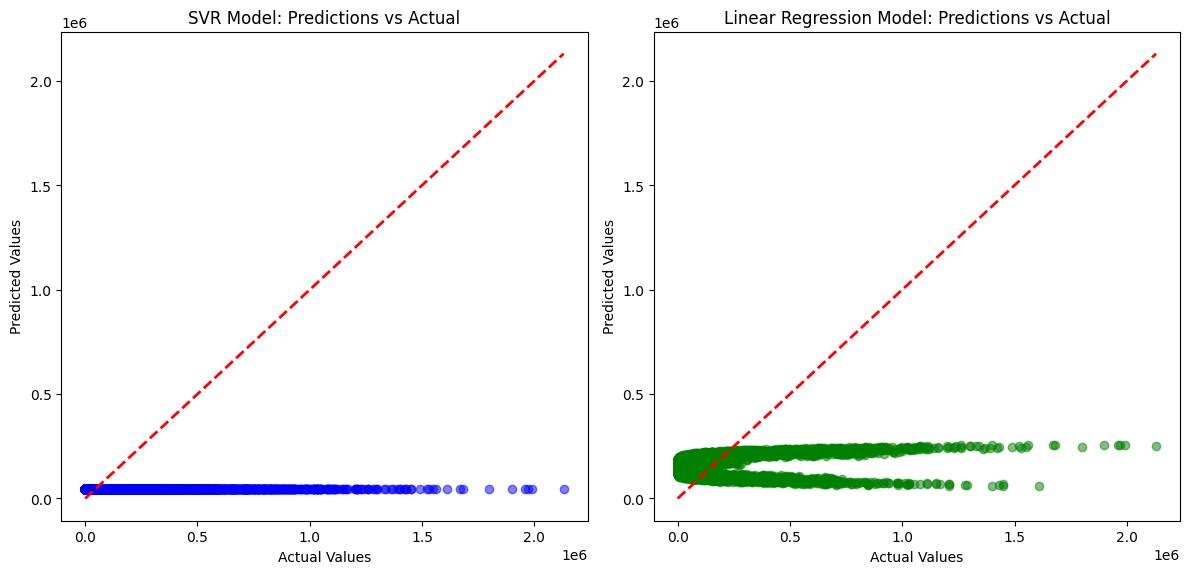

In [13]:
import matplotlib.pyplot as plt

# Plotting predictions vs actual values for SVR model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, svr_predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('SVR Model: Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plotting predictions vs actual values for Linear Regression model
plt.subplot(1, 2, 2)
plt.scatter(y_test, linear_predictions, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Linear Regression Model: Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()
